# Experiment 1: House Price Prediction

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/taipeitechmmslab/MMSLAB-TF2/blob/master/Lab2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/taipeitechmmslab/MMSLAB-TF2/blob/master/Lab2.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

### Import packages

In [31]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

### Reading and converting data

In [69]:
data = pd.read_csv(".\Dataset\kc_house_data.csv")
# # Display the shape of the dataset, a total of 21613 samples, each sample has 21 different kinds of information.
data.shape

(21613, 21)

In [33]:
# Set the number of rows to 25
pd.options.display.max_columns = 25
# display the first five lines (default)
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


The dataset has a total of 21,613 housing data, and each house sample has 21 different information, the codes indicate the following meanings:
-	id: The identification code of the house.
-	date: The date the house was sold.
-	price: Housing price (target).
-	bedrooms: Number of bedrooms.
-	bathrooms: Number of bathrooms.
-	sqft_living: The area of the apartments interior living space (square feet).
-	sqft_lot: The area of the land space (square feet).
-	floors: The total floors of the house.
-	waterfront: A variable for whether the apartment was overlooking the waterfront or not.
-	view: An index of how good the view of the property was
-	condition: An index on the condition of the apartment.
-	grade: An index for rating building construction and design (according to the King County scoring system).
-	sqft_above: The area of the interior housing space that is above ground level (square feet).
-	sqft_basement: The area of the interior housing space that is below ground level (square feet).
-	yr_built: Building time.
-	yr_renovated: The last renovation time of the house.
-	zipcode: ZIP code that the house is in.
-	lat: Latitude coordinates.
-	long: Longitude coordinates.
-	sqft_living15: The square footage of living space recorded in 2015 (implies some renovations)
-	sqft_lot15: The square footage of land lots recorded in 2015. 

Check the data type: There are five types of data: object (string), Boolean, integer, float, and categorical

In [34]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### Convert data type: 
Because the date data in the dataset is in a string type while the input of the model only accepts a numeric type, date data including year, month, and day are converted into the numeric values through the following code:

In [35]:
# convert to numeric values
data['year'] = pd.to_numeric(data['date'].str.slice(0, 4))
data['month'] = pd.to_numeric(data['date'].str.slice(4, 6))
data['day'] = pd.to_numeric(data['date'].str.slice(6, 8))

# Delete useless data, inplace is to save the updated data to the original place
data.drop(['id'], axis="columns", inplace=True)
data.drop(['date'], axis="columns", inplace=True)

data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18


### Data division 
Split data: Divide dataset into three sets: training data, validation data, and test data.

In [37]:
data_num = data.shape[0]
# Get a random index equal to the number of data,
indexes = np.random.permutation(data_num)
# Randomly divide data into Train, validation and test. The division ratio here is 6:2:2
train_indexes = indexes[:int(data_num *0.6)]
val_indexes = indexes[int(data_num *0.6):int(data_num *0.8)]
test_indexes = indexes[int(data_num *0.8):]
# Retrieve training data, validation data and test data 
train_data = data.loc[train_indexes]
val_data = data.loc[val_indexes]
test_data = data.loc[test_indexes]

Data Normalization

the Standard Score is used to standardize the data, which is formulated as follows. 
x_norm=(x-mean)/std

In [38]:
train_validation_data = pd.concat([train_data, val_data])
mean = train_validation_data.mean()
std = train_validation_data.std()

train_data = (train_data - mean) / std
val_data = (val_data - mean) / std

Create the training data in Numpy array format

In [39]:
x_train = np.array(train_data.drop('price', axis='columns'))
y_train = np.array(train_data['price'])
x_val = np.array(val_data.drop('price', axis='columns'))
y_val = np.array(val_data['price'])

There are a total of 12967 training samples, and each sample has 21 kinds of information.

In [40]:
x_train.shape

(12967, 21)

### Building and Training Network Model

1.	Build a fully connected neural network, named model-1

In [47]:
# Create a fully connected neural network
model = keras.Sequential(name='model-1')
# # The first fully connected layer is set to 64 neurons, and the input shape is set to (21, ), 
# but in fact the shape of the data we input is (batch_size, 21)
model.add(layers.Dense(64, activation='relu', input_shape=(21,)))
#The second fully connected layer (64 neurons)
model.add(layers.Dense(64, activation='relu'))
# The output fully connected layer ( 1 neuron).
model.add(layers.Dense(1))
# Display network model structure
model.summary()

Model: "model-1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                1408      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 5,633
Trainable params: 5,633
Non-trainable params: 0
_________________________________________________________________


2.	Set the optimizer, loss function, metric function and callback function.

•	Set the optimizer, loss function, metric function

In [48]:
model.compile(keras.optimizers.Adam(0.001),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.MeanAbsoluteError()])

•	Create a directory to save Model

In [50]:
model_dir = 'lab2-logs/models/'
os.makedirs(model_dir)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'lab2-logs/models/'

•	Set the callback function:

In [51]:
# TensorBoard callback function helps record training information and save as TensorBoard log file
log_dir = os.path.join('lab2-logs', 'model-1')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)
# ModelCheckpoint helps to save the network model, 
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-1.h5', 
                                        monitor='val_mean_absolute_error', 
                                        save_best_only=True, 
                                        mode='min')

3.	Training model.

In [53]:
history = model.fit(x_train, y_train,  # training data
               batch_size=64,  # Batch size is set to 64
               epochs=300,  # Train the entire dataset 300 times
               validation_data=(x_val, y_val),  # Verification information
               callbacks=[model_cbk, model_mckp]) 

Epoch 1/300
203/203 [==============================] - 0s 2ms/step - loss: 0.0376 - mean_absolute_error: 0.1345 - val_loss: 0.1367 - val_mean_absolute_error: 0.2167
Epoch 2/300
203/203 [==============================] - 0s 913us/step - loss: 0.0309 - mean_absolute_error: 0.1265 - val_loss: 0.1318 - val_mean_absolute_error: 0.2125
Epoch 3/300
203/203 [==============================] - 0s 902us/step - loss: 0.0267 - mean_absolute_error: 0.1213 - val_loss: 0.1373 - val_mean_absolute_error: 0.2172
Epoch 4/300
203/203 [==============================] - 0s 917us/step - loss: 0.0260 - mean_absolute_error: 0.1199 - val_loss: 0.1353 - val_mean_absolute_error: 0.2143
Epoch 5/300
203/203 [==============================] - 0s 852us/step - loss: 0.0270 - mean_absolute_error: 0.1220 - val_loss: 0.1376 - val_mean_absolute_error: 0.2166
Epoch 6/300
203/203 [==============================] - 0s 852us/step - loss: 0.0267 - mean_absolute_error: 0.1215 - val_loss: 0.1351 - val_mean_absolute_error: 0.2155


Epoch 96/300
203/203 [==============================] - 0s 812us/step - loss: 0.0232 - mean_absolute_error: 0.1140 - val_loss: 0.1424 - val_mean_absolute_error: 0.2209
Epoch 97/300
203/203 [==============================] - 0s 782us/step - loss: 0.0237 - mean_absolute_error: 0.1154 - val_loss: 0.1455 - val_mean_absolute_error: 0.2215
Epoch 98/300
203/203 [==============================] - 0s 826us/step - loss: 0.0260 - mean_absolute_error: 0.1197 - val_loss: 0.1433 - val_mean_absolute_error: 0.2240
Epoch 99/300
203/203 [==============================] - 0s 842us/step - loss: 0.0248 - mean_absolute_error: 0.1178 - val_loss: 0.1441 - val_mean_absolute_error: 0.2205
Epoch 100/300
203/203 [==============================] - 0s 854us/step - loss: 0.0235 - mean_absolute_error: 0.1151 - val_loss: 0.1466 - val_mean_absolute_error: 0.2250
Epoch 101/300
203/203 [==============================] - 0s 945us/step - loss: 0.0250 - mean_absolute_error: 0.1184 - val_loss: 0.1465 - val_mean_absolute_erro

203/203 [==============================] - 0s 898us/step - loss: 0.0254 - mean_absolute_error: 0.1170 - val_loss: 0.1484 - val_mean_absolute_error: 0.2264
Epoch 193/300
203/203 [==============================] - 0s 937us/step - loss: 0.0238 - mean_absolute_error: 0.1140 - val_loss: 0.1455 - val_mean_absolute_error: 0.2270
Epoch 194/300
203/203 [==============================] - 0s 853us/step - loss: 0.0233 - mean_absolute_error: 0.1147 - val_loss: 0.1459 - val_mean_absolute_error: 0.2247
Epoch 195/300
203/203 [==============================] - 0s 945us/step - loss: 0.0221 - mean_absolute_error: 0.1109 - val_loss: 0.1459 - val_mean_absolute_error: 0.2264
Epoch 196/300
203/203 [==============================] - 0s 897us/step - loss: 0.0223 - mean_absolute_error: 0.1121 - val_loss: 0.1465 - val_mean_absolute_error: 0.2242
Epoch 197/300
203/203 [==============================] - 0s 985us/step - loss: 0.0224 - mean_absolute_error: 0.1123 - val_loss: 0.1471 - val_mean_absolute_error: 0.2257


203/203 [==============================] - 0s 886us/step - loss: 0.0220 - mean_absolute_error: 0.1112 - val_loss: 0.1448 - val_mean_absolute_error: 0.2259
Epoch 289/300
203/203 [==============================] - 0s 881us/step - loss: 0.0214 - mean_absolute_error: 0.1098 - val_loss: 0.1546 - val_mean_absolute_error: 0.2377
Epoch 290/300
203/203 [==============================] - 0s 911us/step - loss: 0.0204 - mean_absolute_error: 0.1079 - val_loss: 0.1482 - val_mean_absolute_error: 0.2262
Epoch 291/300
203/203 [==============================] - 0s 873us/step - loss: 0.0205 - mean_absolute_error: 0.1082 - val_loss: 0.1510 - val_mean_absolute_error: 0.2284
Epoch 292/300
203/203 [==============================] - 0s 727us/step - loss: 0.0207 - mean_absolute_error: 0.1087 - val_loss: 0.1516 - val_mean_absolute_error: 0.2279
Epoch 293/300
203/203 [==============================] - 0s 842us/step - loss: 0.0215 - mean_absolute_error: 0.1097 - val_loss: 0.1504 - val_mean_absolute_error: 0.2275


### Displaying Training Results

In [54]:
history.history.keys()  # View what information is saved in history

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

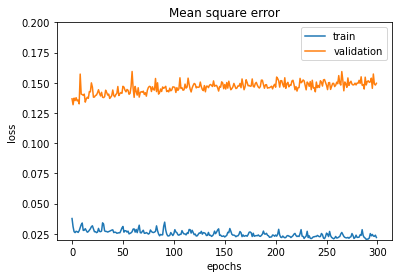

In [55]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.ylim(0.02, 0.2)
plt.title('Mean square error')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')

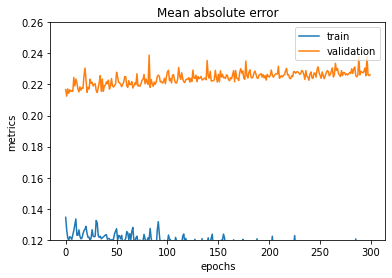

In [56]:
plt.plot(history.history['mean_absolute_error'], label='train')
plt.plot(history.history['val_mean_absolute_error'], label='validation')
plt.ylim(0.12, 0.26)
plt.title('Mean absolute error')
plt.ylabel('metrics')
plt.xlabel('epochs')
plt.legend(loc='upper right')

The average percentage error on test data

Predict house price on test data and calculate the average percentage error.

In [57]:
# #Load model
model = keras.models.load_model('lab2-logs/models/Best-model-1.h5')
# take out the house price
y_test = np.array(test_data['price'])
# data normalization
test_data = (test_data - mean) / std
# Save the input data in Numpy format
x_test = np.array(test_data.drop('price', axis='columns'))
# Predict on test data
y_pred = model.predict(x_test)
# Convert the prediction results back 
y_pred = np.reshape(y_pred * std['price'] + mean['price'], y_test.shape)
# Calculate the mean percentage error
percentage_error = np.mean(np.abs(y_test - y_pred)) / np.mean(y_test) * 100
# Display percentage error
print("Model_1 Percentage Error: {:.2f}%".format(percentage_error))

Model_1 Percentage Error: 13.94%


### TensorBoard

In [60]:
# display TensorBoard directly on the jupyter notebook
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [61]:
%tensorboard --port 9530 --logdir lab2-logs

Reusing TensorBoard on port 9530 (pid 9028), started 0:08:01 ago. (Use '!kill 9028' to kill it.)

# Experiment 2: Overfitting Problem

### 1.	Model-2: model of reducing the model-1 size 

In [63]:
#Create model-2
model_2 = keras.Sequential(name='model-2')
model_2.add(layers.Dense(16, activation='relu', input_shape=(21,)))
model_2.add(layers.Dense(16, activation='relu'))
model_2.add(layers.Dense(1))

# Set the optimizer, loss function and metrics function for training
model_2.compile(keras.optimizers.Adam(0.001),
                loss=keras.losses.MeanSquaredError(),
                metrics=[keras.metrics.MeanAbsoluteError()])

# Set callback function
log_dir = os.path.join('lab2-logs', 'model-2')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-2.h5', 
                                             monitor='val_mean_absolute_error', 
                                             save_best_only=True, 
                                             mode='min')
# Train model-2
model_2.fit(x_train, y_train, 
            batch_size=64 ,
            epochs=300, 
            validation_data=(x_val, y_val), 
            callbacks=[model_cbk, model_mckp])

Epoch 1/300
203/203 [==============================] - 1s 3ms/step - loss: 0.4557 - mean_absolute_error: 0.4348 - val_loss: 0.2867 - val_mean_absolute_error: 0.3488
Epoch 2/300
203/203 [==============================] - 0s 906us/step - loss: 0.2648 - mean_absolute_error: 0.3278 - val_loss: 0.2311 - val_mean_absolute_error: 0.3091
Epoch 3/300
203/203 [==============================] - 0s 911us/step - loss: 0.2358 - mean_absolute_error: 0.3068 - val_loss: 0.2132 - val_mean_absolute_error: 0.2974
Epoch 4/300
203/203 [==============================] - 0s 945us/step - loss: 0.2185 - mean_absolute_error: 0.2926 - val_loss: 0.1982 - val_mean_absolute_error: 0.2813
Epoch 5/300
203/203 [==============================] - 0s 955us/step - loss: 0.2060 - mean_absolute_error: 0.2833 - val_loss: 0.1896 - val_mean_absolute_error: 0.2765
Epoch 6/300
203/203 [==============================] - 0s 871us/step - loss: 0.1966 - mean_absolute_error: 0.2759 - val_loss: 0.1855 - val_mean_absolute_error: 0.2743


Epoch 96/300
203/203 [==============================] - 0s 694us/step - loss: 0.0818 - mean_absolute_error: 0.1844 - val_loss: 0.1163 - val_mean_absolute_error: 0.2032
Epoch 97/300
203/203 [==============================] - 0s 748us/step - loss: 0.0817 - mean_absolute_error: 0.1830 - val_loss: 0.1133 - val_mean_absolute_error: 0.2023
Epoch 98/300
203/203 [==============================] - 0s 743us/step - loss: 0.0818 - mean_absolute_error: 0.1846 - val_loss: 0.1179 - val_mean_absolute_error: 0.2055
Epoch 99/300
203/203 [==============================] - 0s 827us/step - loss: 0.0815 - mean_absolute_error: 0.1844 - val_loss: 0.1143 - val_mean_absolute_error: 0.2040
Epoch 100/300
203/203 [==============================] - 0s 847us/step - loss: 0.0808 - mean_absolute_error: 0.1824 - val_loss: 0.1163 - val_mean_absolute_error: 0.2038
Epoch 101/300
203/203 [==============================] - 0s 847us/step - loss: 0.0809 - mean_absolute_error: 0.1831 - val_loss: 0.1178 - val_mean_absolute_erro

203/203 [==============================] - 0s 714us/step - loss: 0.0732 - mean_absolute_error: 0.1775 - val_loss: 0.1175 - val_mean_absolute_error: 0.2044
Epoch 193/300
203/203 [==============================] - 0s 832us/step - loss: 0.0729 - mean_absolute_error: 0.1769 - val_loss: 0.1128 - val_mean_absolute_error: 0.2066
Epoch 194/300
203/203 [==============================] - 0s 793us/step - loss: 0.0734 - mean_absolute_error: 0.1773 - val_loss: 0.1159 - val_mean_absolute_error: 0.2018
Epoch 195/300
203/203 [==============================] - 0s 793us/step - loss: 0.0742 - mean_absolute_error: 0.1791 - val_loss: 0.1129 - val_mean_absolute_error: 0.1990
Epoch 196/300
203/203 [==============================] - 0s 842us/step - loss: 0.0725 - mean_absolute_error: 0.1763 - val_loss: 0.1150 - val_mean_absolute_error: 0.1995
Epoch 197/300
203/203 [==============================] - 0s 847us/step - loss: 0.0736 - mean_absolute_error: 0.1780 - val_loss: 0.1188 - val_mean_absolute_error: 0.2024


203/203 [==============================] - 0s 791us/step - loss: 0.0695 - mean_absolute_error: 0.1745 - val_loss: 0.1162 - val_mean_absolute_error: 0.1980
Epoch 289/300
203/203 [==============================] - 0s 792us/step - loss: 0.0705 - mean_absolute_error: 0.1748 - val_loss: 0.1167 - val_mean_absolute_error: 0.2044
Epoch 290/300
203/203 [==============================] - 0s 883us/step - loss: 0.0695 - mean_absolute_error: 0.1749 - val_loss: 0.1132 - val_mean_absolute_error: 0.1983
Epoch 291/300
203/203 [==============================] - 0s 855us/step - loss: 0.0699 - mean_absolute_error: 0.1743 - val_loss: 0.1160 - val_mean_absolute_error: 0.1982
Epoch 292/300
203/203 [==============================] - 0s 812us/step - loss: 0.0707 - mean_absolute_error: 0.1764 - val_loss: 0.1182 - val_mean_absolute_error: 0.2026
Epoch 293/300
203/203 [==============================] - 0s 812us/step - loss: 0.0706 - mean_absolute_error: 0.1743 - val_loss: 0.1188 - val_mean_absolute_error: 0.2005


### 2. Model-3: model of adding weights regularization.

In [64]:
# Create a network model
model_3 = keras.Sequential(name='model-3')
model_3.add(layers.Dense(64, 
                         kernel_regularizer=keras.regularizers.l2(0.001), 
                         activation='relu', input_shape=(21,)))
model_3.add(layers.Dense(64, kernel_regularizer=keras.regularizers.l2(0.001), activation='relu'))
model_3.add(layers.Dense(1))

# Set the optimizer, loss function and metric function for training
model_3.compile(keras.optimizers.Adam(0.001),
                loss=keras.losses.MeanSquaredError(),
                metrics=[keras.metrics.MeanAbsoluteError()])

# Set callback function
log_dir = os.path.join('lab2-logs', 'model-3')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-3.h5', 
                                             monitor='val_mean_absolute_error', 
                                             save_best_only=True, 
                                             mode='min')
# Train model-3
model_3.fit(x_train, y_train, 
            batch_size=64 ,
            epochs=300, 
            validation_data=(x_val, y_val), 
            callbacks=[model_cbk, model_mckp])

Epoch 1/300
203/203 [==============================] - 1s 4ms/step - loss: 0.4417 - mean_absolute_error: 0.3468 - val_loss: 0.3137 - val_mean_absolute_error: 0.3050
Epoch 2/300
203/203 [==============================] - 0s 994us/step - loss: 0.2976 - mean_absolute_error: 0.2873 - val_loss: 0.2670 - val_mean_absolute_error: 0.2674
Epoch 3/300
203/203 [==============================] - 0s 896us/step - loss: 0.2605 - mean_absolute_error: 0.2647 - val_loss: 0.2477 - val_mean_absolute_error: 0.2580
Epoch 4/300
203/203 [==============================] - 0s 926us/step - loss: 0.2395 - mean_absolute_error: 0.2523 - val_loss: 0.2354 - val_mean_absolute_error: 0.2457
Epoch 5/300
203/203 [==============================] - 0s 916us/step - loss: 0.2284 - mean_absolute_error: 0.2436 - val_loss: 0.2191 - val_mean_absolute_error: 0.2420
Epoch 6/300
203/203 [==============================] - 0s 975us/step - loss: 0.2109 - mean_absolute_error: 0.2328 - val_loss: 0.2045 - val_mean_absolute_error: 0.2247


Epoch 96/300
203/203 [==============================] - 0s 886us/step - loss: 0.0899 - mean_absolute_error: 0.1687 - val_loss: 0.1303 - val_mean_absolute_error: 0.1953
Epoch 97/300
203/203 [==============================] - 0s 936us/step - loss: 0.0898 - mean_absolute_error: 0.1686 - val_loss: 0.1305 - val_mean_absolute_error: 0.1956
Epoch 98/300
203/203 [==============================] - 0s 935us/step - loss: 0.0924 - mean_absolute_error: 0.1722 - val_loss: 0.1361 - val_mean_absolute_error: 0.2010
Epoch 99/300
203/203 [==============================] - 0s 921us/step - loss: 0.0910 - mean_absolute_error: 0.1690 - val_loss: 0.1366 - val_mean_absolute_error: 0.1992
Epoch 100/300
203/203 [==============================] - 0s 921us/step - loss: 0.0940 - mean_absolute_error: 0.1715 - val_loss: 0.1316 - val_mean_absolute_error: 0.1987
Epoch 101/300
203/203 [==============================] - 0s 990us/step - loss: 0.0886 - mean_absolute_error: 0.1675 - val_loss: 0.1287 - val_mean_absolute_erro

203/203 [==============================] - 0s 837us/step - loss: 0.0811 - mean_absolute_error: 0.1641 - val_loss: 0.1490 - val_mean_absolute_error: 0.2027
Epoch 193/300
203/203 [==============================] - 0s 847us/step - loss: 0.0777 - mean_absolute_error: 0.1614 - val_loss: 0.1484 - val_mean_absolute_error: 0.2003
Epoch 194/300
203/203 [==============================] - 0s 886us/step - loss: 0.0847 - mean_absolute_error: 0.1666 - val_loss: 0.1299 - val_mean_absolute_error: 0.1967
Epoch 195/300
203/203 [==============================] - 0s 862us/step - loss: 0.0792 - mean_absolute_error: 0.1640 - val_loss: 0.1306 - val_mean_absolute_error: 0.1986
Epoch 196/300
203/203 [==============================] - 0s 852us/step - loss: 0.0765 - mean_absolute_error: 0.1598 - val_loss: 0.1302 - val_mean_absolute_error: 0.1955
Epoch 197/300
203/203 [==============================] - 0s 842us/step - loss: 0.0769 - mean_absolute_error: 0.1605 - val_loss: 0.1299 - val_mean_absolute_error: 0.1921


203/203 [==============================] - 0s 783us/step - loss: 0.0752 - mean_absolute_error: 0.1597 - val_loss: 0.1236 - val_mean_absolute_error: 0.1931
Epoch 289/300
203/203 [==============================] - 0s 945us/step - loss: 0.0728 - mean_absolute_error: 0.1581 - val_loss: 0.1223 - val_mean_absolute_error: 0.1909
Epoch 290/300
203/203 [==============================] - 0s 886us/step - loss: 0.0733 - mean_absolute_error: 0.1580 - val_loss: 0.1307 - val_mean_absolute_error: 0.1995
Epoch 291/300
203/203 [==============================] - 0s 911us/step - loss: 0.0771 - mean_absolute_error: 0.1604 - val_loss: 0.1292 - val_mean_absolute_error: 0.1964
Epoch 292/300
203/203 [==============================] - 0s 916us/step - loss: 0.0740 - mean_absolute_error: 0.1586 - val_loss: 0.1240 - val_mean_absolute_error: 0.1906
Epoch 293/300
203/203 [==============================] - 0s 906us/step - loss: 0.0733 - mean_absolute_error: 0.1588 - val_loss: 0.1297 - val_mean_absolute_error: 0.1958


### 3. Model-4: model of adding Dropout: 

In [65]:
model_4 = keras.Sequential(name='model-4')
model_4.add(layers.Dense(64, activation='relu', input_shape=(21,)))
model_4.add(layers.Dropout(0.3))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dropout(0.3))
model_4.add(layers.Dense(1))

model_4.compile(keras.optimizers.Adam(0.001),
                loss=keras.losses.MeanSquaredError(),
                metrics=[keras.metrics.MeanAbsoluteError()])

log_dir = os.path.join('lab2-logs', 'model-4')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-4.h5', 
                                             monitor='val_mean_absolute_error', 
                                             save_best_only=True, 
                                             mode='min')
model_4.fit(x_train, y_train, 
            batch_size=64 ,
            epochs=300, 
            validation_data=(x_val, y_val), 
            callbacks=[model_cbk, model_mckp])

Epoch 1/300
203/203 [==============================] - 1s 3ms/step - loss: 0.5195 - mean_absolute_error: 0.4634 - val_loss: 0.2703 - val_mean_absolute_error: 0.3157
Epoch 2/300
203/203 [==============================] - 0s 1ms/step - loss: 0.3365 - mean_absolute_error: 0.3618 - val_loss: 0.2210 - val_mean_absolute_error: 0.2942
Epoch 3/300
203/203 [==============================] - 0s 1ms/step - loss: 0.3000 - mean_absolute_error: 0.3370 - val_loss: 0.2104 - val_mean_absolute_error: 0.2917
Epoch 4/300
203/203 [==============================] - 0s 1ms/step - loss: 0.2685 - mean_absolute_error: 0.3166 - val_loss: 0.1862 - val_mean_absolute_error: 0.2729
Epoch 5/300
203/203 [==============================] - 0s 1ms/step - loss: 0.2412 - mean_absolute_error: 0.3045 - val_loss: 0.1919 - val_mean_absolute_error: 0.2781
Epoch 6/300
203/203 [==============================] - 0s 1ms/step - loss: 0.2259 - mean_absolute_error: 0.2958 - val_loss: 0.1954 - val_mean_absolute_error: 0.2771
Epoch 7/30

Epoch 48/300
203/203 [==============================] - 0s 1ms/step - loss: 0.1542 - mean_absolute_error: 0.2383 - val_loss: 0.1358 - val_mean_absolute_error: 0.2236
Epoch 49/300
203/203 [==============================] - 0s 1ms/step - loss: 0.1383 - mean_absolute_error: 0.2359 - val_loss: 0.1387 - val_mean_absolute_error: 0.2288
Epoch 50/300
203/203 [==============================] - 0s 1ms/step - loss: 0.1399 - mean_absolute_error: 0.2367 - val_loss: 0.1257 - val_mean_absolute_error: 0.2230
Epoch 51/300
203/203 [==============================] - 0s 1ms/step - loss: 0.1383 - mean_absolute_error: 0.2356 - val_loss: 0.1422 - val_mean_absolute_error: 0.2342
Epoch 52/300
203/203 [==============================] - 0s 1ms/step - loss: 0.1334 - mean_absolute_error: 0.2349 - val_loss: 0.1283 - val_mean_absolute_error: 0.2185
Epoch 53/300
203/203 [==============================] - 0s 1ms/step - loss: 0.1356 - mean_absolute_error: 0.2354 - val_loss: 0.1302 - val_mean_absolute_error: 0.2243
Epoc

203/203 [==============================] - 0s 1ms/step - loss: 0.1222 - mean_absolute_error: 0.2228 - val_loss: 0.1239 - val_mean_absolute_error: 0.2227
Epoch 147/300
203/203 [==============================] - 0s 1ms/step - loss: 0.1168 - mean_absolute_error: 0.2212 - val_loss: 0.1257 - val_mean_absolute_error: 0.2213
Epoch 148/300
203/203 [==============================] - 0s 1ms/step - loss: 0.1146 - mean_absolute_error: 0.2208 - val_loss: 0.1196 - val_mean_absolute_error: 0.2259
Epoch 149/300
203/203 [==============================] - 0s 1ms/step - loss: 0.1187 - mean_absolute_error: 0.2207 - val_loss: 0.1277 - val_mean_absolute_error: 0.2194
Epoch 150/300
203/203 [==============================] - 0s 1ms/step - loss: 0.1142 - mean_absolute_error: 0.2210 - val_loss: 0.1284 - val_mean_absolute_error: 0.2226
Epoch 151/300
203/203 [==============================] - 0s 1ms/step - loss: 0.1118 - mean_absolute_error: 0.2198 - val_loss: 0.1277 - val_mean_absolute_error: 0.2232
Epoch 152/30

203/203 [==============================] - 0s 1ms/step - loss: 0.1090 - mean_absolute_error: 0.2130 - val_loss: 0.1167 - val_mean_absolute_error: 0.2112
Epoch 245/300
203/203 [==============================] - 0s 1ms/step - loss: 0.1059 - mean_absolute_error: 0.2139 - val_loss: 0.1200 - val_mean_absolute_error: 0.2195
Epoch 246/300
203/203 [==============================] - 0s 1ms/step - loss: 0.1132 - mean_absolute_error: 0.2172 - val_loss: 0.1157 - val_mean_absolute_error: 0.2146
Epoch 247/300
203/203 [==============================] - 0s 1ms/step - loss: 0.1113 - mean_absolute_error: 0.2165 - val_loss: 0.1182 - val_mean_absolute_error: 0.2196
Epoch 248/300
203/203 [==============================] - 0s 1ms/step - loss: 0.1078 - mean_absolute_error: 0.2151 - val_loss: 0.1175 - val_mean_absolute_error: 0.2191
Epoch 249/300
203/203 [==============================] - 0s 1ms/step - loss: 0.1158 - mean_absolute_error: 0.2163 - val_loss: 0.1599 - val_mean_absolute_error: 0.2347
Epoch 250/30

### After training, the trained Model-2, Model-3, and Model-4 are verified on the test data:

Test model 2:

In [66]:
model_2 = keras.models.load_model('lab2-logs/models/Best-model-2.h5')
y_pred = model_2.predict(x_test)
y_pred = np.reshape(y_pred * std['price'] + mean['price'], y_test.shape)
percentage_error = np.mean(np.abs(y_test - y_pred)) / np.mean(y_test) * 100
print("Model_2: {:.2f}%".format(percentage_error))

Model_2: 13.11%


Test model 3:

In [67]:
model_3 = keras.models.load_model('lab2-logs/models/Best-model-3.h5')
y_pred = model_3.predict(x_test)
y_pred = np.reshape(y_pred * std['price'] + mean['price'], y_test.shape)
percentage_error = np.mean(np.abs(y_test - y_pred)) / np.mean(y_test) * 100
print("Model_3: {:.2f}%".format(percentage_error))

Model_3: 12.81%


Test model 4:

In [68]:
model_4 = keras.models.load_model('lab2-logs/models/Best-model-4.h5')
y_pred = model_4.predict(x_test)
y_pred = np.reshape(y_pred * std['price'] + mean['price'], y_test.shape)
percentage_error = np.mean(np.abs(y_test - y_pred)) / np.mean(y_test) * 100
print("Model_4: {:.2f}%".format(percentage_error))

Model_4: 13.82%
